# Predicting Poker Hand

### STEP 1: IMPORTING LIBRARIES

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### STEP 2: LOADING THE DATASET

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
poker_df = pd.read_csv('/content/drive/MyDrive/Projects/Data/poker_hand_test.data')
poker_df.head()

,1,1.1,1.2,13,2,4,2.1,3,1.3,12,0
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0


### STEP 3: ANALYSING AND PRE-PROCESSING THE DATA

### STEP 4: CHANGING NAMES OF COLUMN ACCORDING TO THE REFERENCES PROVIDED FROM WHERE THE DATASET IS OBTAINED

In [22]:
poker_df.columns = ['first_suit', 'first_rank', 'second_suit', 'second_rank', 'third_suit', 'third_rank',
'fourth_suit', 'fourth_rank', 'fifth_suit', 'fifth_rank', 'hand']

labels = ['zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush', 'full_house',
'four_of_a_kind', 'straight_flush', 'royal_flush']

poker_df.head()

,first_suit,first_rank,second_suit,second_rank,third_suit,third_rank,fourth_suit,fourth_rank,fifth_suit,fifth_rank,hand
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0


In [23]:
### 4) SEPERATING THE DATASET INTO FEATURES (X) AND TARGET VALUES (y)
X = poker_df.iloc[:, 0:9]
y = poker_df.hand
X.head()

,first_suit,first_rank,second_suit,second_rank,third_suit,third_rank,fourth_suit,fourth_rank,fifth_suit
0,3,12,3,2,3,11,4,5,2
1,1,9,4,6,1,4,3,2,3
2,1,4,3,13,2,13,2,1,3
3,3,10,2,7,1,2,2,11,4
4,1,3,4,5,3,4,1,12,4


### STEP 5: VISUALIZING WHETHER CLASS BALANCE IS PRESENT IN OUR DATASET OR NOT

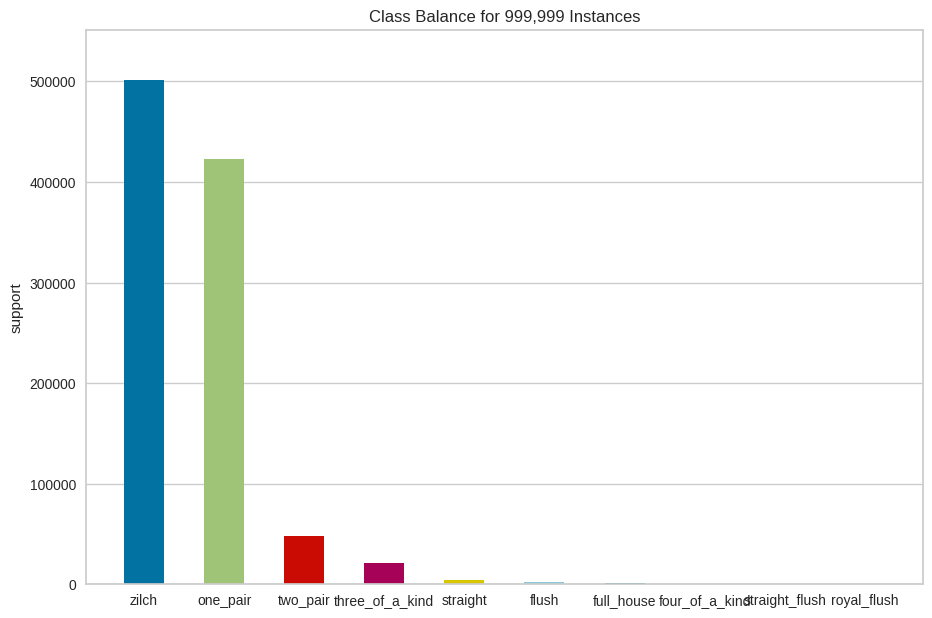

<Axes: title={'center': 'Class Balance for 999,999 Instances'}, ylabel='support'>

In [24]:
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassPredictionError
balance = ClassBalance(size=(1080,720), labels=labels)
balance.fit(y)
balance.show()

##### THUS THERE IS CLASS IMBALANCE PRESENT IN OUR DATASET, ANS WE MUST REMOVE IT

### STEP 6: UP-SAMPLING FROM MINORITY CLASSES

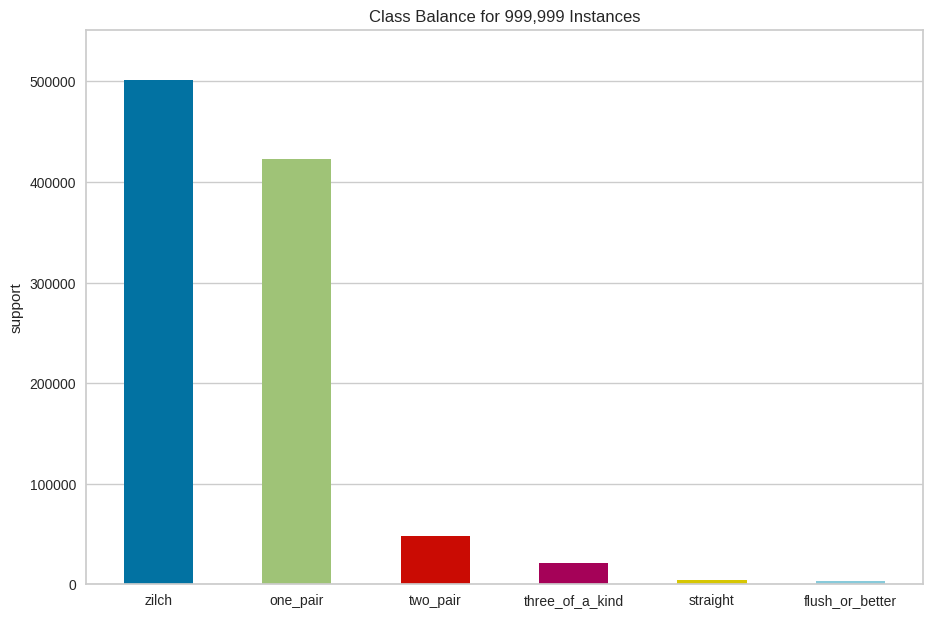

<Axes: title={'center': 'Class Balance for 999,999 Instances'}, ylabel='support'>

In [25]:
poker_df.loc[poker_df['hand']>=5, 'hand'] = 5
y = poker_df.hand
labels = ['zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush_or_better']
balance = ClassBalance(size=(1080,720), labels=labels)
balance.fit(y)
balance.show()

### STEP 7: TRAINING THE RANDOM FORESTS CLASSIFIER

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

#CLF = SVC()
CLF = MLPClassifier(solver = 'adam', alpha = 0.05, hidden_layer_sizes=(50, 100, 50), learning_rate = 'adaptive', activation = 'tanh')

CLF.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(50, 100, 50),
              learning_rate='adaptive')

### STEP 8: EVALUATING THE MODEL

In [27]:
#### A) CLASSIFICATION ACCURACY
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score

y_pred_test = CLF.predict(X_test)
y_pred_train = CLF.predict(X_train)

print ("Accuracy of the Model on Train Data is : {}".format(accuracy_score(y_train, y_pred_train)))
print ("Accuracy of the Model on Test Data is : {}".format(accuracy_score(y_test, y_pred_test)))

Accuracy of the Model on Train Data is : 0.7754495508991018
Accuracy of the Model on Test Data is : 0.774706


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


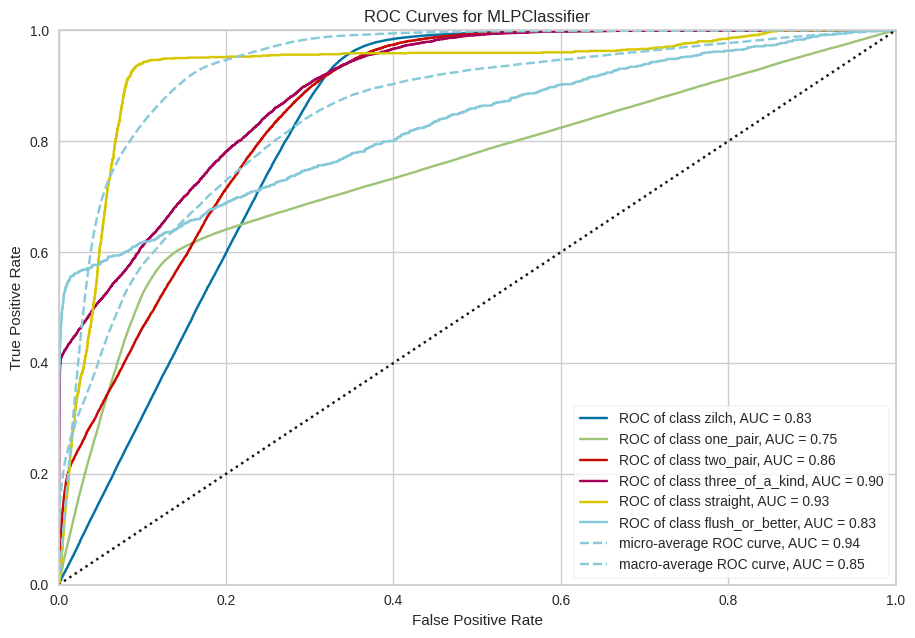

<Axes: title={'center': 'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [34]:
### B) ROC CURVE AND AUC:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from yellowbrick.classifier import ROCAUC
from sklearn.datasets import load_iris  # Replace with your actual data loading

# Initialize the ROCAUC visualizer with the fitted classifier
rocauc = ROCAUC(CLF, size=(1080, 720), classes=labels)

# Fit the visualizer with training data
rocauc.fit(X_train, y_train)

# Score the visualizer with test data
rocauc.score(X_test, y_test)

# Show the visualization
rocauc.show()

### STEP 9: CLASSIFICATION REPORT HEATMAP

/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


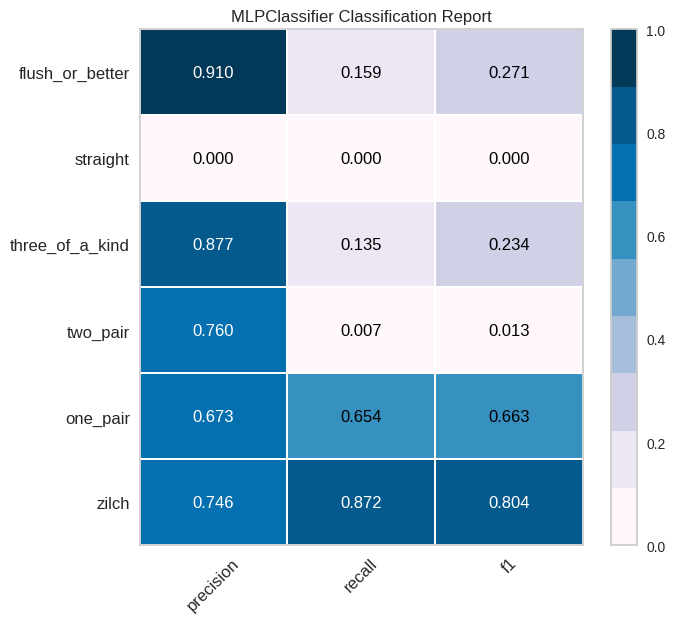

<Axes: title={'center': 'MLPClassifier Classification Report'}>

In [35]:
from yellowbrick.classifier import ClassificationReport

report = ClassificationReport(CLF, size = (720, 640), classes = labels, cmap = 'PuBu')
report.score(X_test, y_test)
report.show()

### STEP 10: CLASS PREDICTION ERROR

/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


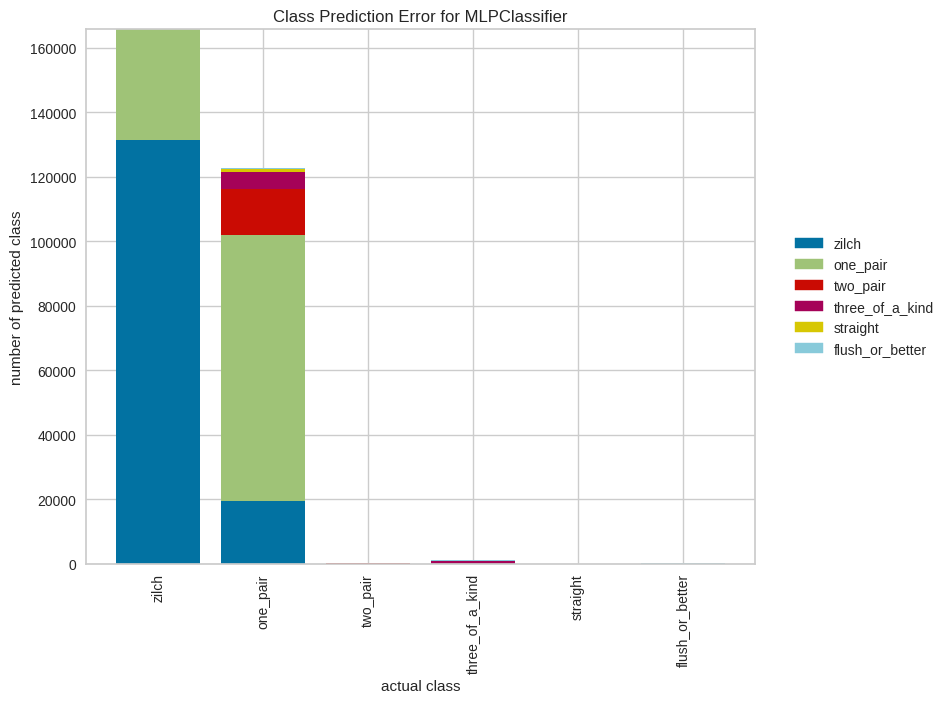

<Axes: title={'center': 'Class Prediction Error for MLPClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [36]:
error = ClassPredictionError(CLF, size= [1080, 720], classes = labels)
error.score(X_test, y_test)
error.poof()